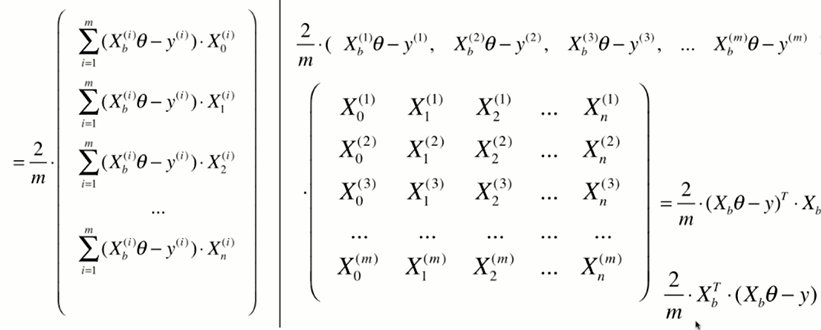

In [1]:
import numpy as np
from sklearn import datasets

boston = datasets.load_boston()

In [2]:
X = boston.data
y = boston.target

In [3]:
X = X[y < 50.0]
y = y[y < 50.0]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
from grid.LinearRegression import LinearRegression

lin_reg = LinearRegression()

In [6]:
%time lin_reg.fit_normal(X_train,y_train)
lin_reg.score(X_test, y_test)

Wall time: 14 ms


0.7427205389827902

### 梯度下降法

In [7]:
lin_reg2 = LinearRegression()

In [8]:
lin_reg.fit_gd(X_train, y_train)

D:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
C:\Users\TuringEmmy\Desktop\grid\LinearRegression.py:32: RuntimeWarning: overflow encountered in square
  return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
C:\Users\TuringEmmy\Desktop\grid\LinearRegression.py:53: RuntimeWarning: invalid value encountered in double_scalars
  if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
C:\Users\TuringEmmy\Desktop\grid\LinearRegression.py:42: RuntimeWarning: overflow encountered in multiply
  return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(X_b)


LinearRegression()

In [9]:
lin_reg2.coef_

In [10]:
X_train[:10,:]

array([[9.59571e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.93000e-01,
        6.40400e+00, 1.00000e+02, 1.63900e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.76110e+02, 2.03100e+01],
       [5.73116e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.32000e-01,
        7.06100e+00, 7.70000e+01, 3.41060e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.95280e+02, 7.01000e+00],
       [3.25430e-01, 0.00000e+00, 2.18900e+01, 0.00000e+00, 6.24000e-01,
        6.43100e+00, 9.88000e+01, 1.81250e+00, 4.00000e+00, 4.37000e+02,
        2.12000e+01, 3.96900e+02, 1.53900e+01],
       [6.63510e-01, 2.00000e+01, 3.97000e+00, 0.00000e+00, 6.47000e-01,
        7.33300e+00, 1.00000e+02, 1.89460e+00, 5.00000e+00, 2.64000e+02,
        1.30000e+01, 3.83290e+02, 7.79000e+00],
       [3.96100e-02, 0.00000e+00, 5.19000e+00, 0.00000e+00, 5.15000e-01,
        6.03700e+00, 3.45000e+01, 5.98530e+00, 5.00000e+00, 2.24000e+02,
        2.02000e+01, 3.96900e+02, 8.01000e+00],
       [1.41030e-01, 0.00000e+

In [11]:
lin_reg2.intercept_

In [13]:
lin_reg2.fit_gd(X_train,y_train,eta=0.0000001)

LinearRegression()

In [14]:
lin_reg2.coef_

array([-0.01378902,  0.06408785, -0.01453459,  0.00015297,  0.00043238,
        0.01511439, -0.00260624,  0.0079862 , -0.00392507,  0.00064166,
        0.01492714,  0.05662361, -0.03289558])

In [15]:
lin_reg2.intercept_

0.0014513913420437028

In [16]:
%time lin_reg2.fit_gd(X_train,y_train,eta=0.0000001,n_iters=1e6)

Wall time: 57 s


LinearRegression()

In [17]:
lin_reg2.score(X_test, y_test)

0.5732729120858306

上面的数据太费时,因为数据没有归一化

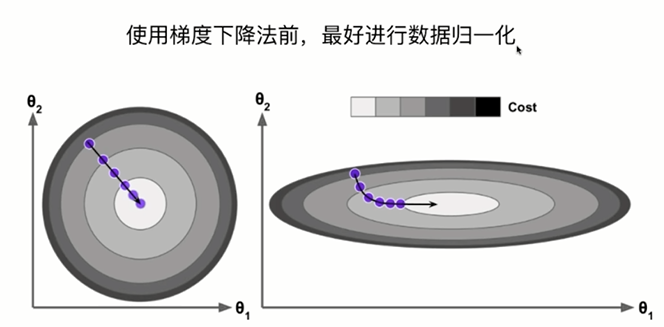

### 对数据进行归一化

In [18]:
from sklearn.preprocessing import StandardScaler

In [20]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
X_train_standard = standardScaler.transform(X_train)

In [23]:
lin_reg3 = LinearRegression()
%time lin_reg3.fit_gd(X_train_standard, y_train)

Wall time: 277 ms


LinearRegression()

In [25]:
X_test_standard = standardScaler.transform(X_test)
lin_reg3.score(X_test_standard, y_test)

0.7427154926971997

### 梯度下降的优势

In [27]:
m = 1000
n = 5000

big_X = np.random.normal(size=(m, n))

In [28]:
true_theta = np.random.uniform(0.0, 100.0, size=n+1)
big_y = big_X.dot(true_theta[1:]) + true_theta[0] + np.random.normal(0,10,size=m)

In [29]:
big_reg1 = LinearRegression()
%time big_reg1.fit_normal(big_X, big_y)

Wall time: 11 s


LinearRegression()

In [30]:
big_reg2 = LinearRegression()
%time big_reg2.fit_gd(big_X, big_y)

Wall time: 7.07 s


LinearRegression()